In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as plotnine
from plotnine import ggplot, aes

In [7]:
titanic=sns.load_dataset ('titanic')

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
cols=titanic.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
#Droping the 'deck' column because it contains too many null values.
titanic_clean=titanic.drop("deck",axis=1,inplace=True)

In [14]:
#Droping the rows containing null values from the columns 'age' & 'embark_town'
titanic_clean=titanic.dropna(axis=0)

In [15]:
#Droping the rows containing 0 in the 'fare' column
titanic_clean=titanic[titanic.fare!=0]

In [16]:
titanic_clean.isnull().sum()

survived         0
pclass           0
sex              0
age            169
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     876 non-null    int64   
 1   pclass       876 non-null    int64   
 2   sex          876 non-null    object  
 3   age          707 non-null    float64 
 4   sibsp        876 non-null    int64   
 5   parch        876 non-null    int64   
 6   fare         876 non-null    float64 
 7   embarked     874 non-null    object  
 8   class        876 non-null    category
 9   who          876 non-null    object  
 10  adult_male   876 non-null    bool    
 11  embark_town  874 non-null    object  
 12  alive        876 non-null    object  
 13  alone        876 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 84.8+ KB


## Analysing the Titanic data set

# Survived

In [18]:
titanic_clean['survived'].value_counts()

0    535
1    341
Name: survived, dtype: int64

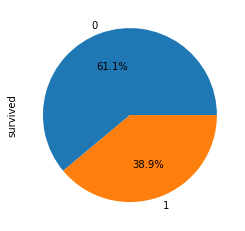

In [19]:
titanic_clean['survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Pclass

In [20]:
titanic_clean['pclass'].value_counts()

3    487
1    211
2    178
Name: pclass, dtype: int64

In [21]:
#We can learn form the value count that most of passengers abord the titanic were in the 3rd class. But does that mean that most of the survivers were form the 3rd class? let's see.
titanic_clean.groupby(['pclass','survived'])['survived'].count()

pclass  survived
1       0            75
        1           136
2       0            91
        1            87
3       0           369
        1           118
Name: survived, dtype: int64

C:\Users\netar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


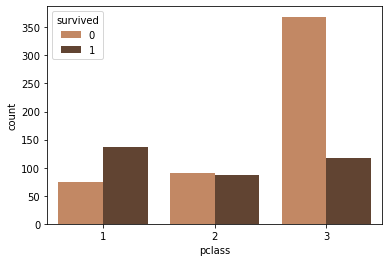

In [22]:
#As shown above we can see that even though most of the passengers were 3rd class there's more survivers in other classes, i'll use a plot to show this more visually
sns.countplot('pclass', data=titanic_clean, hue='survived',palette='copper_r')
plt.show()

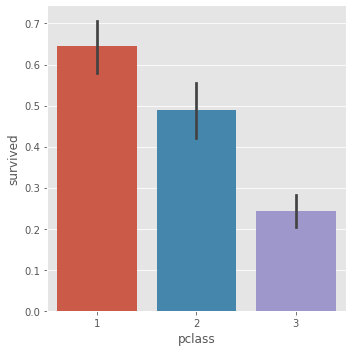

In [23]:
#Visualizing the survival probability rate for each class
plt.style.use('ggplot')
sns.catplot(x='pclass',y='survived', data=titanic_clean, kind='bar')
plt.show()

## Sex 

In [24]:
titanic_clean['sex'].value_counts()

male      562
female    314
Name: sex, dtype: int64

In [25]:
titanic_clean.groupby(['sex','survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           454
        1           108
Name: survived, dtype: int64

C:\Users\netar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


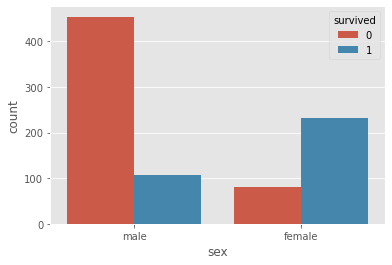

In [26]:
#As shown above there is more male passengers than female, but there are much more female survivers, i'll show this by a count plot
sns.countplot('sex', hue='survived', data=titanic_clean)
plt.show()

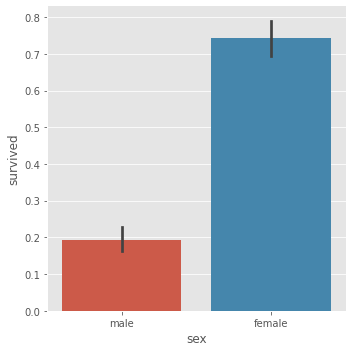

In [27]:
#Visualizing the survival propbability rate for each sex
sns.catplot(x='sex', y='survived', data=titanic_clean, kind='bar')
plt.show()

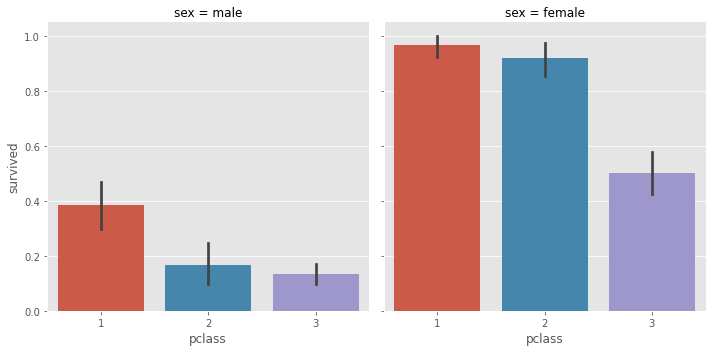

In [28]:
#Visualizing the survival propbability rate for passengers by sex and class
sns.catplot(x='pclass', y='survived', data=titanic_clean, kind='bar', col='sex')
plt.show()

# Age

In [29]:
titanic_clean['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 876, dtype: float64

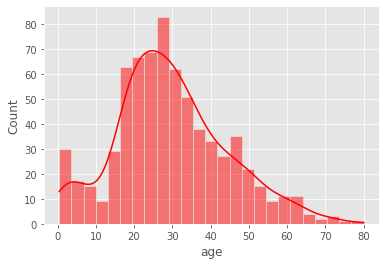

In [30]:
#Visualizing the age distribution on the titanic
sns.histplot(titanic_clean['age'], kde=True, color='red', bins=25)
plt.show()

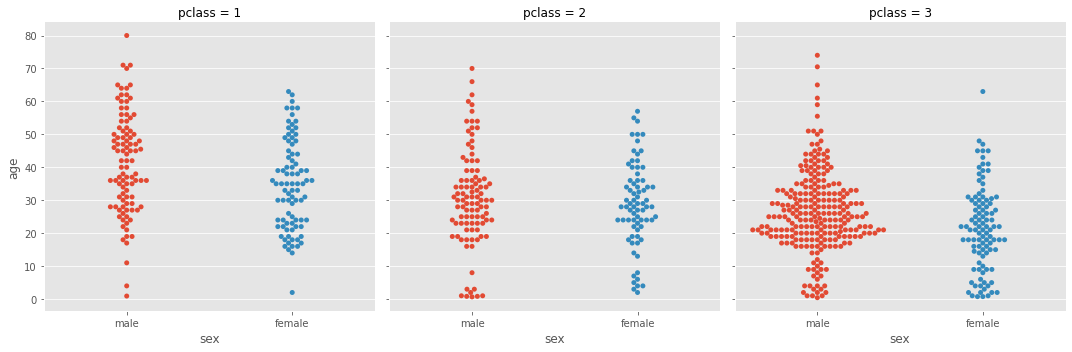

In [31]:
#Visualizing the titanic passengers by age, sex and class
sns.catplot(x='sex', y='age', col='pclass', data=titanic_clean, kind='swarm')
plt.show()

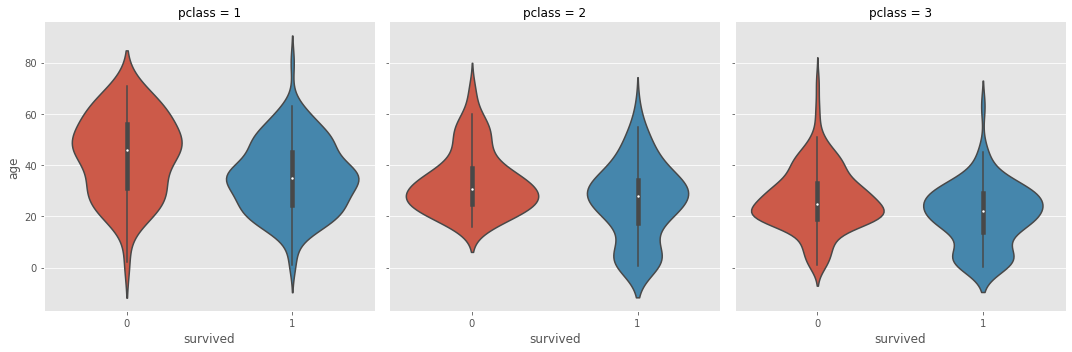

In [32]:
#Violin catplot in order to visualize the age distribution of survivers in each class.
sns.catplot(x='survived', y='age', data=titanic_clean, kind='violin', col='pclass')
plt.show()

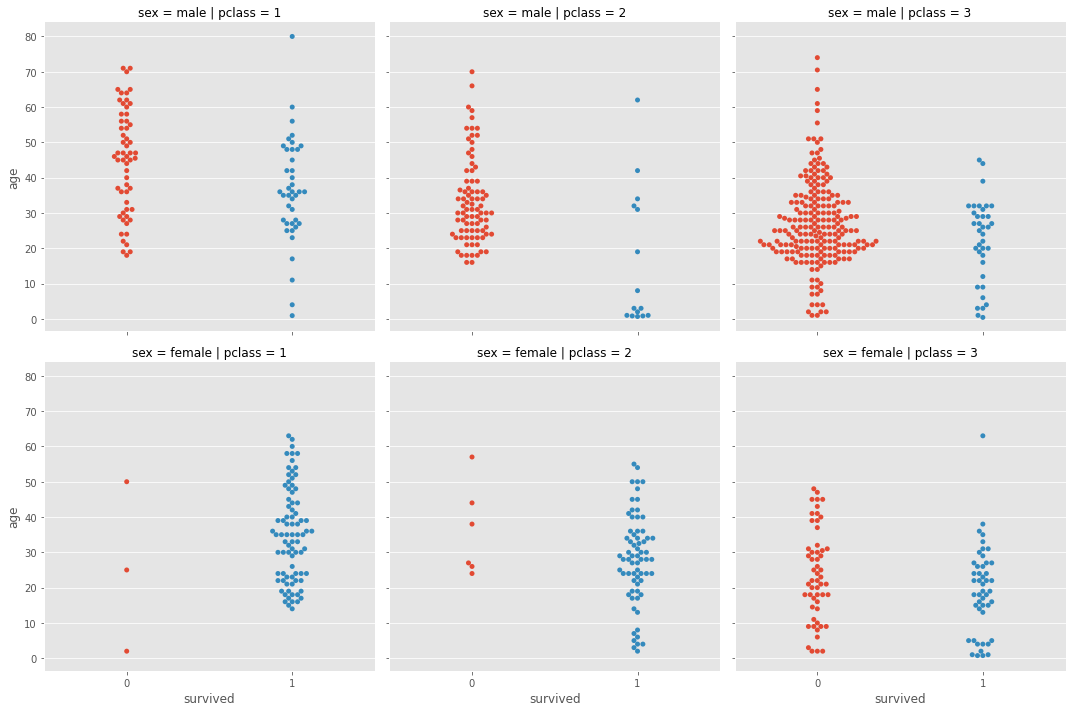

In [33]:
#Now visualizing the age distribution of survivers in each class for every sex
sns.catplot (x='survived', y='age', data=titanic_clean, kind='swarm', col='pclass', row='sex')
plt.show()

# Fare

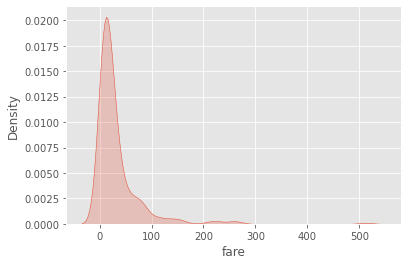

In [34]:
sns.kdeplot(titanic_clean['fare'], shade=True)
xlable='fare'
plt.show()

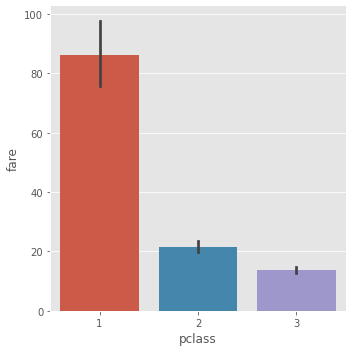

In [35]:
#The plot above shows that most of the passengers payed approxtimately 20$ or less, now let's look for the fare price distribution by class
sns.catplot(x='pclass',y='fare', data=titanic_clean, kind='bar')
plt.show()

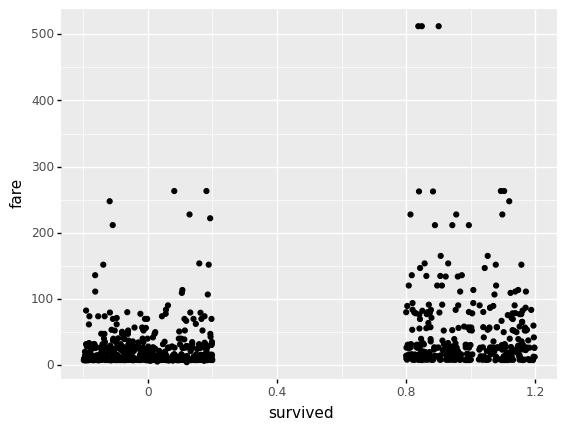

In [41]:
# We can see that the price of 20$ or less is the price for 3rd class which is suited with the earlier data that most passengers were 3rd class.
# Now let's see if passengers who payed an higher fare (i.e higher class passengers) had a higher survival rate 
fare_survival_plot=ggplot(data=titanic_clean, mapping=aes(x='survived', y='fare'))
(fare_survival_plot +
 plotnine.geom_jitter(position=plotnine.position_jitter(0.2))).draw();

# We can see from this plot that passengers had a higher chance of survival if they payed a higher fee (for exemple: all the passengers that payed the highest fees survived and 33 out of the 47 passengers who payed between 100 to 300$ survived)

## Sibsp

In [42]:
titanic_clean['sibsp'].value_counts()

0    593
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

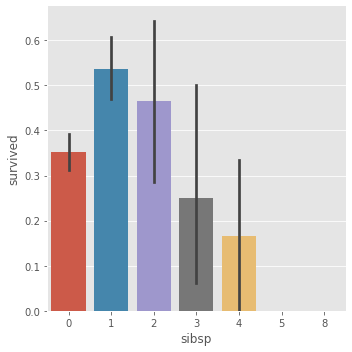

In [43]:
# This plot shows us that passengers that were alone had a lower chance of survival than passengers with spouses or sibilings
sns.catplot(x='sibsp', y='survived', data=titanic_clean, kind='bar')
plt.show()

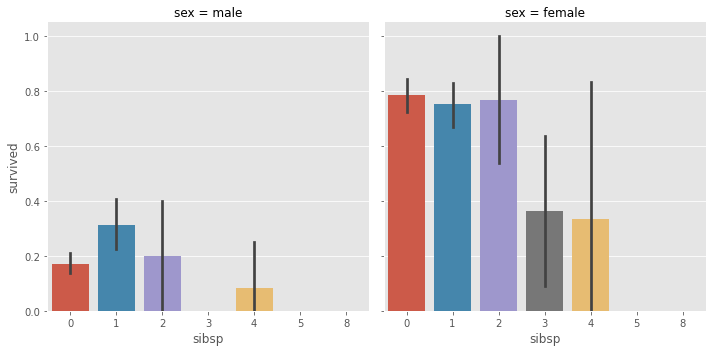

In [44]:
# This plot shows us that women had a higher chance of survival whether they were alone or not
sns.catplot(x='sibsp', y='survived', col='sex', data=titanic_clean, kind='bar')
plt.show()

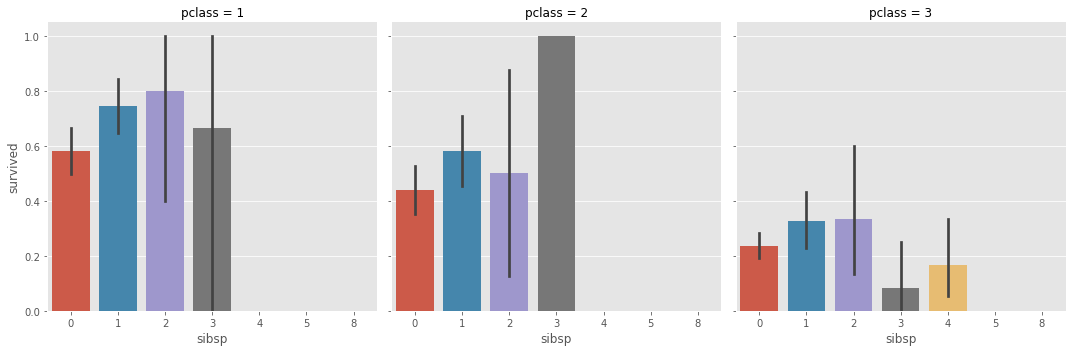

In [45]:
# Looking for the survival rate for passengers with sibilings or spouses by class, this shows us the 2nd class passengers with 3 sibilings had almost 100% chance of survival
sns.catplot(x='sibsp', y='survived', col='pclass', data=titanic_clean, kind='bar')
plt.show()

## Who

In [46]:
titanic_clean['who'].value_counts()

man      522
woman    271
child     83
Name: who, dtype: int64

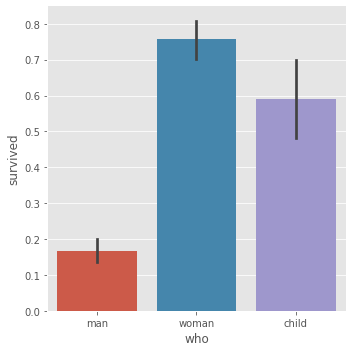

In [47]:
# visualizing the passengers with the highest survival rate in the who column
sns.catplot(x='who', y='survived', data=titanic_clean, kind='bar')
plt.show()

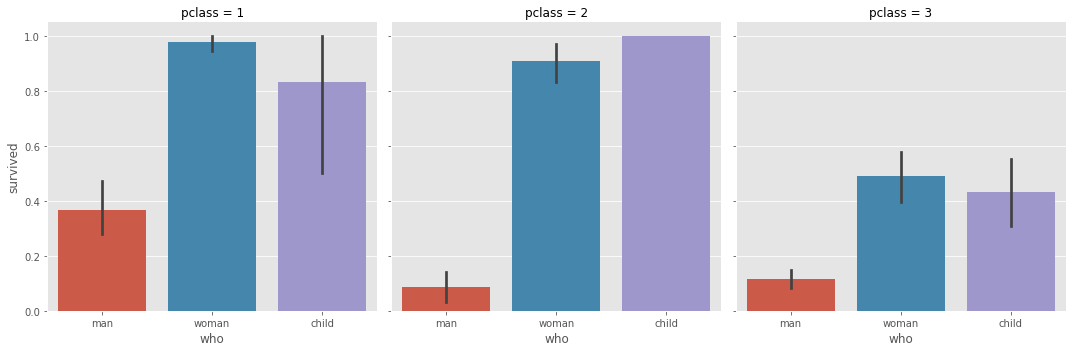

In [48]:
# The plot above shows that women had the highest rate of survival, now let's visualize what kind of passengers had the highest rate of survival in the who column including class
sns.catplot(x='who', y='survived', data=titanic_clean, kind='bar', col='pclass')
plt.show()

# What we can learn for the plot above is that women and children from the 1st and 2nd class had the highest rate of survival (between 80-100%)